<a href="https://colab.research.google.com/github/SanjayD23/codespaces-jupyter/blob/main/Diabetes_prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# **Data** **Collection** **and** **Analysis**

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_excel('/content/diabetes.xls')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#code to check if data set contain any null value or missing value

diabetes_dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#count the number of diabetic and non diabetic patients
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


<Axes: title={'center': 'Diabetic Patients by Age Range'}, xlabel='Age Range'>

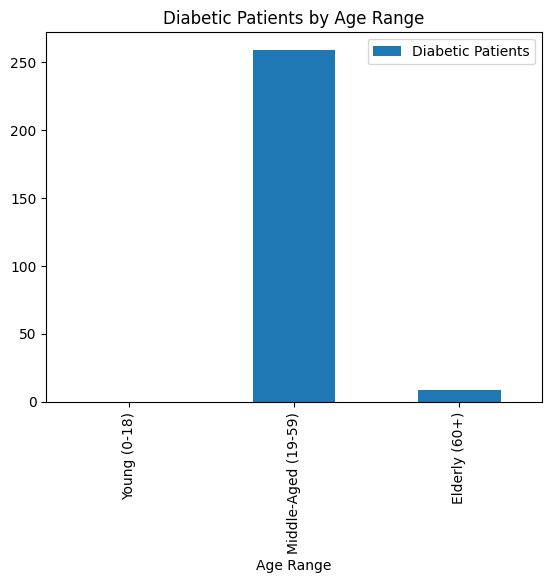

In [ ]:
# plot on the most diabetic patients on the basis of age range young age(1-18),middle age(19-59) and elderly age(60-100)

age = diabetes_dataset['Age']
outcome = diabetes_dataset['Outcome']

young_patients = len(age[(age <= 18) & (outcome == 1)])
middle_aged_patients = len(age[(age > 18) & (age <= 59) & (outcome == 1)])
elderly_patients = len(age[(age >= 60) & (outcome == 1)])

data = {'Age Range': ['Young (0-18)', 'Middle-Aged (19-59)', 'Elderly (60+)'],
       'Diabetic Patients': [young_patients, middle_aged_patients, elderly_patients]}

df = pd.DataFrame(data)

df.plot(x='Age Range', y='Diabetic Patients', kind='bar', title='Diabetic Patients by Age Range')



# **Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **Train Test Split**

In [ ]:
#train test and split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# **Training the Model**

 **Logistic Regression and Desicion Tree Classifier**

In [ ]:
# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Train a Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

# Evaluate the accuracy of the Logistic Regression model
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_pred_logreg, Y_test)

# Evaluate the accuracy of the Decision Tree model
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_pred_dtree, Y_test)

# Print the accuracy of both models
print("Accuracy of Logistic Regression model:", accuracy_logreg)
print("Accuracy of Decision Tree model:", accuracy_dtree)

# Tune the hyperparameters of the Decision Tree model
dtree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree_tuned.fit(X_train, Y_train)

# Evaluate the accuracy of the tuned Decision Tree model
y_pred_dtree_tuned = dtree_tuned.predict(X_test)
accuracy_dtree_tuned = accuracy_score(y_pred_dtree_tuned, Y_test)

# Print the accuracy of the tuned Decision Tree model
print("Accuracy of tuned Decision Tree model:", accuracy_dtree_tuned)

Accuracy of Logistic Regression model: 0.7597402597402597
Accuracy of Decision Tree model: 0.6948051948051948
Accuracy of tuned Decision Tree model: 0.7337662337662337


# **Naive Bayes**

In [ ]:

# Train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

y_pred_naive_bayes = naive_bayes.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_pred_naive_bayes, Y_test)

# Print the accuracy of the model
print("Accuracy of Naive Bayes model:", accuracy_naive_bayes)


Accuracy of Naive Bayes model: 0.7727272727272727


# **KNN**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, Y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(Y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

# Check if the accuracy is above 90%
if accuracy > 0.9:
  print("Model is accurate enough.")
else:
  print("Model needs further improvement.")


Accuracy: 0.6948051948051948
Model needs further improvement.


# **SVM**

In [ ]:
# Train the SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

# Predict the labels for the test data
predicted_labels = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, predicted_labels)

# Print the accuracy
print("Accuracy:", accuracy)

# Check if the accuracy is above 90%
if accuracy > 0.9:
  print("Model is accurate enough.")
else:
  print("Model needs further improvement.")


Accuracy: 0.7727272727272727
Model needs further improvement.


# **Making a Predictive System**

In [ ]:
 input_data = (5,166,72,19,175,25.8,0.587,51)

# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, Y_train)

# Make predictions on the test data
predictions = nb_classifier.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(Y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

# Make a prediction for the input data
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = nb_classifier.predict(input_data_reshaped)

# Print the prediction
if prediction[0] == 0:
  print("The person is not diabetic")
else:
  print("The person is diabetic")


Accuracy: 0.7727272727272727
The person is diabetic
